# Project 02 - Machine Learning Analysis
## Student Habits and Academic Performance

**Team Members:**
- Ana Paula Paula Canuto da Silva - a24178
- Daniel Filipe Alves Vilmin - a28003
- Eva Alexandra Pereira Gomes - a27484
- Glória Ribeiro Chaves Martins - a22719
- Thiago Yabuki de Araujo - a24207

Link para GitHub: https://github.com/yabukithiago/IA_25_P01_G06

## Project Steps
* Load and Explore Dataset (https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset?resource=download)
* Data Preparation
* Classification (Random Forest, KNN)
* Clustering (K-Means)
* Association Rules (Apriori)


### Main Objective:
- Predict students' academic performance (exam score) based on habits and characteristics

### Specific Objectives:
- Classification: Categorize students into Low/Medium/High performance
- Clustering: Identify distinct student profiles
- Association Rules: Discover patterns between habits and academic success

### Practical Application:
- Early warning system for educational interventions

#Load and Explore Dataset

In [6]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load file
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving enhanced_student_habits_performance_dataset.csv to enhanced_student_habits_performance_dataset.csv
User uploaded file "enhanced_student_habits_performance_dataset.csv" with length 11541221 bytes


In [8]:
# Read dataset
df = pd.read_csv('enhanced_student_habits_performance_dataset.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (80000, 31)


,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [9]:
# Data quality check
print("\n" + "=" * 80)
print("DATA QUALITY SUMMARY")
print("=" * 80)
print(f"Total Records: {len(df):,}")
print(f"Complete Records: {df.dropna().shape[0]:,}")
print(f"Duplicate Records: {df.duplicated().sum()}")
print(f"\nNumerical Features: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"Categorical Features: {df.select_dtypes(include=['object']).shape[1]}")
print(f"\nData Quality: {'✓ GOOD' if df.isnull().sum().sum() == 0 else '⚠ NEEDS ATTENTION'}")


DATA QUALITY SUMMARY
Total Records: 80,000
Complete Records: 80,000
Duplicate Records: 0

Numerical Features: 19
Categorical Features: 12

Data Quality: ✓ GOOD


In [10]:
# Check missing values
print("Missing Values Analysis:")
missing = df.isnull().sum()
missing_df = pd.DataFrame({
    'Missing Count': missing,
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print(" No missing values found!")

Missing Values Analysis:
 No missing values found!


In [11]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       80000 non-null 

## Dataset Metadata

In [12]:
# Dataset Metadata
print("=" * 80)
print("DATASET METADATA")
print("=" * 80)
print(f"Dataset Name: Enhanced Student Habits Performance Dataset")
print(f"Number of Records: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1]}")
print(f"\nFeature Types:")
print(f"  - Numerical: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"  - Categorical: {df.select_dtypes(include=['object']).shape[1]}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATASET METADATA
Dataset Name: Enhanced Student Habits Performance Dataset
Number of Records: 80,000
Number of Features: 31

Feature Types:
  - Numerical: 19
  - Categorical: 12

Memory Usage: 61.11 MB


In [13]:
# Column descriptions
print("\n" + "=" * 80)
print("COLUMN DESCRIPTIONS")
print("=" * 80)

column_info = {
    'student_id': 'Unique identifier for each student',
    'age': 'Student age (years)',
    'gender': 'Student gender',
    'major': 'Academic major/field of study',
    'study_hours_per_day': 'Daily study hours',
    'social_media_hours': 'Daily social media usage (hours)',
    'netflix_hours': 'Daily streaming/Netflix hours',
    'part_time_job': 'Whether student has part-time job',
    'attendance_percentage': 'Class attendance rate (%)',
    'sleep_hours': 'Daily sleep hours',
    'diet_quality': 'Quality of diet (Poor/Average/Good/Excellent)',
    'exercise_frequency': 'Weekly exercise frequency',
    'parental_education_level': 'Highest education level of parents',
    'internet_quality': 'Quality of internet connection',
    'mental_health_rating': 'Self-reported mental health score',
    'extracurricular_participation': 'Participation in extracurricular activities',
    'previous_gpa': 'Previous semester GPA',
    'semester': 'Current semester number',
    'stress_level': 'Self-reported stress level (1-10)',
    'dropout_risk': 'Risk level of dropping out (Low/Medium/High)',
    'social_activity': 'Weekly social activities frequency',
    'screen_time': 'Total daily screen time (hours)',
    'study_environment': 'Primary study environment',
    'access_to_tutoring': 'Whether student has access to tutoring',
    'family_income_range': 'Family income bracket',
    'parental_support_level': 'Level of parental support (1-10)',
    'motivation_level': 'Self-reported motivation level (1-10)',
    'exam_anxiety_score': 'Exam anxiety score (1-10)',
    'learning_style': 'Preferred learning style',
    'time_management_score': 'Time management ability score',
    'exam_score': 'TARGET: Final exam score (0-100)'
}

for col in df.columns:
    if col in column_info:
        print(f"\n{col}:")
        print(f"  Description: {column_info[col]}")
        print(f"  Type: {df[col].dtype}")
        if df[col].dtype == 'object':
            print(f"  Unique values: {df[col].nunique()}")
        else:
            print(f"  Range: [{df[col].min()}, {df[col].max()}]")


COLUMN DESCRIPTIONS

student_id:
  Description: Unique identifier for each student
  Type: int64
  Range: [100000, 179999]

age:
  Description: Student age (years)
  Type: int64
  Range: [16, 28]

gender:
  Description: Student gender
  Type: object
  Unique values: 3

major:
  Description: Academic major/field of study
  Type: object
  Unique values: 6

study_hours_per_day:
  Description: Daily study hours
  Type: float64
  Range: [0.0, 12.0]

social_media_hours:
  Description: Daily social media usage (hours)
  Type: float64
  Range: [0.0, 5.0]

netflix_hours:
  Description: Daily streaming/Netflix hours
  Type: float64
  Range: [0.0, 4.0]

part_time_job:
  Description: Whether student has part-time job
  Type: object
  Unique values: 2

attendance_percentage:
  Description: Class attendance rate (%)
  Type: float64
  Range: [40.0, 100.0]

sleep_hours:
  Description: Daily sleep hours
  Type: float64
  Range: [4.0, 12.0]

diet_quality:
  Description: Quality of diet (Poor/Average/Go

In [14]:
# Summary of categorical features
print("\nCategorical Features Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'student_id':
        print(f"\n{col}:")
        print(df[col].value_counts())
        print("-" * 50)


Categorical Features Summary:

gender:
gender
Female    26705
Male      26698
Other     26597
Name: count, dtype: int64
--------------------------------------------------

major:
major
Arts                13505
Psychology          13437
Computer Science    13352
Business            13276
Engineering         13229
Biology             13201
Name: count, dtype: int64
--------------------------------------------------

part_time_job:
part_time_job
No     40195
Yes    39805
Name: count, dtype: int64
--------------------------------------------------

diet_quality:
diet_quality
Good    39935
Fair    26713
Poor    13352
Name: count, dtype: int64
--------------------------------------------------

parental_education_level:
parental_education_level
Some College    16115
High School     16106
Bachelor        15986
Master          15908
PhD             15885
Name: count, dtype: int64
--------------------------------------------------

internet_quality:
internet_quality
High      26749
Low       

## Exploratory Data Analysis (EDA)

In [15]:
# Statistical summary
print("Statistical Summary of Numerical Features:")
df.describe()

Statistical Summary of Numerical Features:


,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,stress_level,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,139999.500000,22.004288,4.174388,2.501366,1.997754,69.967884,7.017417,3.516587,6.804107,3.602448,4.497338,5.012478,2.500225,9.673029,5.479438,5.488525,8.508475,5.499132,89.141350
std,23094.155105,3.745570,2.004135,1.445441,1.155992,17.333015,1.467377,2.291575,1.921579,0.462876,2.295312,1.953174,1.704292,2.780869,2.873327,2.867782,1.796411,2.603534,11.591497
min,100000.000000,16.000000,0.000000,0.000000,0.000000,40.000000,4.000000,0.000000,1.000000,1.640000,1.000000,1.000000,0.000000,0.300000,1.000000,1.000000,5.000000,1.000000,36.000000
25%,119999.750000,19.000000,2.800000,1.200000,1.000000,55.000000,6.000000,2.000000,5.500000,3.270000,2.000000,3.600000,1.000000,7.800000,3.000000,3.000000,7.000000,3.200000,82.000000
50%,139999.500000,22.000000,4.125624,2.500000,2.000000,69.900000,7.000000,4.000000,6.900000,3.790000,5.000000,5.000000,2.000000,9.700000,5.000000,5.000000,10.000000,5.500000,93.000000
75%,159999.250000,25.000000,5.500000,3.800000,3.000000,84.900000,8.000000,6.000000,8.200000,4.000000,7.000000,6.400000,4.000000,11.600000,8.000000,8.000000,10.000000,7.800000,100.000000
max,179999.000000,28.000000,12.000000,5.000000,4.000000,100.000000,12.000000,7.000000,10.000000,4.000000,8.000000,10.000000,5.000000,21.000000,10.000000,10.000000,10.000000,10.000000,100.000000


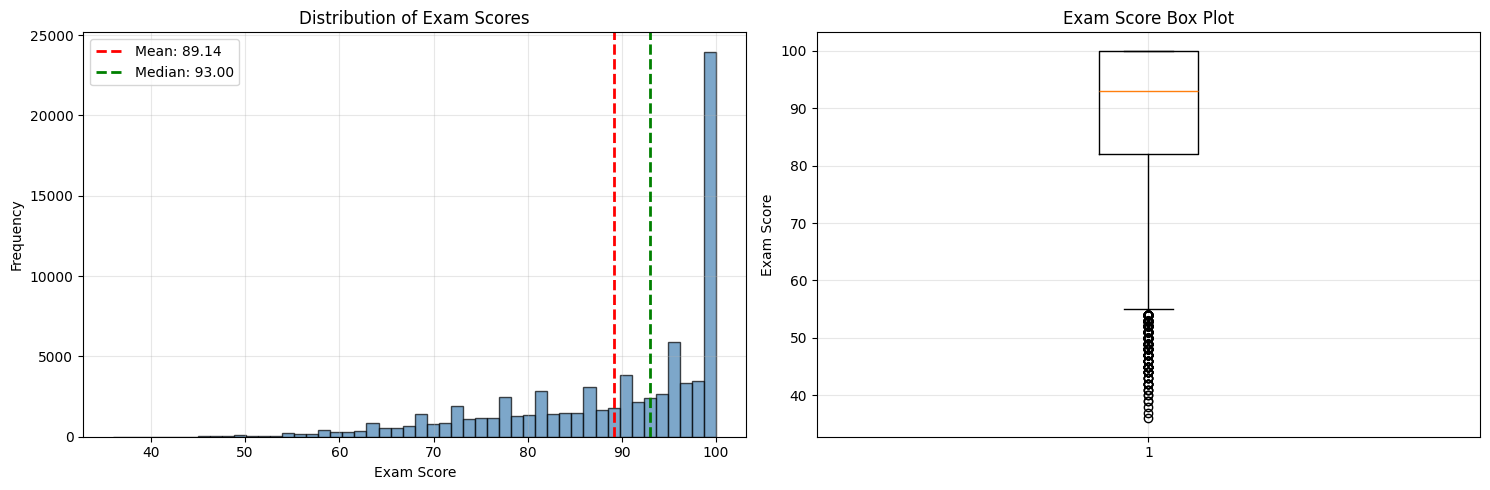


Exam Score Statistics:
  Mean: 89.14
  Median: 93.00
  Std Dev: 11.59
  Min: 36
  Max: 100


In [16]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['exam_score'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(df['exam_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["exam_score"].mean():.2f}')
axes[0].axvline(df['exam_score'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["exam_score"].median():.2f}')
axes[0].set_xlabel('Exam Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Exam Scores')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['exam_score'], vert=True)
axes[1].set_ylabel('Exam Score')
axes[1].set_title('Exam Score Box Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nExam Score Statistics:")
print(f"  Mean: {df['exam_score'].mean():.2f}")
print(f"  Median: {df['exam_score'].median():.2f}")
print(f"  Std Dev: {df['exam_score'].std():.2f}")
print(f"  Min: {df['exam_score'].min()}")
print(f"  Max: {df['exam_score'].max()}")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


Top 10 Features Correlated with Exam Score:
previous_gpa             0.932940
motivation_level         0.250287
study_hours_per_day      0.241460
screen_time              0.169788
sleep_hours              0.090820
exercise_frequency       0.086983
mental_health_rating     0.010556
student_id               0.007557
time_management_score    0.005940
attendance_percentage    0.002876
Name: exam_score, dtype: float64


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

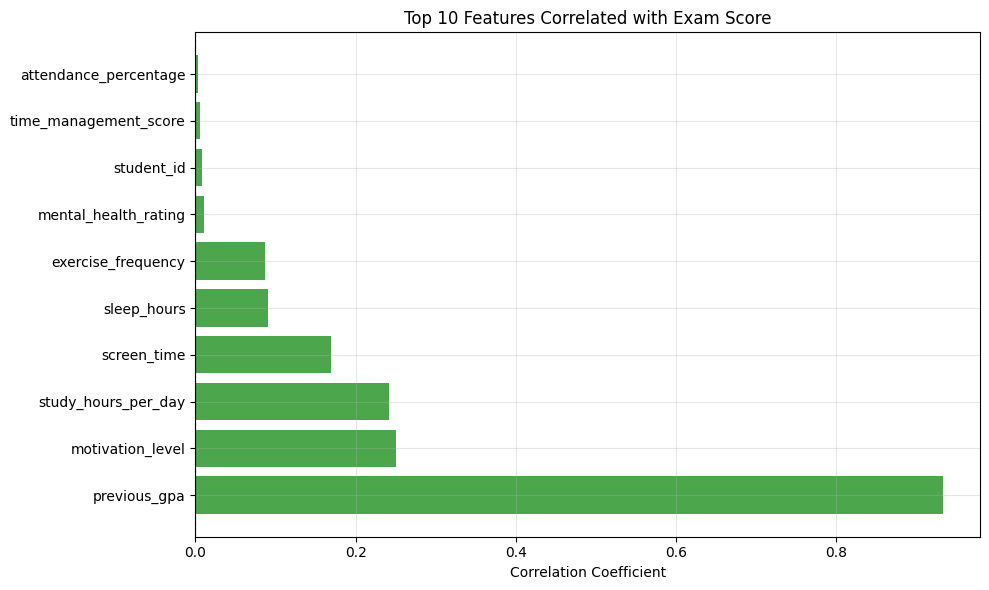

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [41]:
# Correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numerical_cols].corr()['exam_score'].sort_values(ascending=False)

print("\nTop 10 Features Correlated with Exam Score:")
print(correlations[1:11])  # Exclude exam_score itself

# Visualize correlations
plt.figure(figsize=(10, 6))
top_corr = correlations[1:11]
colors = ['green' ]
plt.barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation Coefficient')
plt.title('Top 10 Features Correlated with Exam Score')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

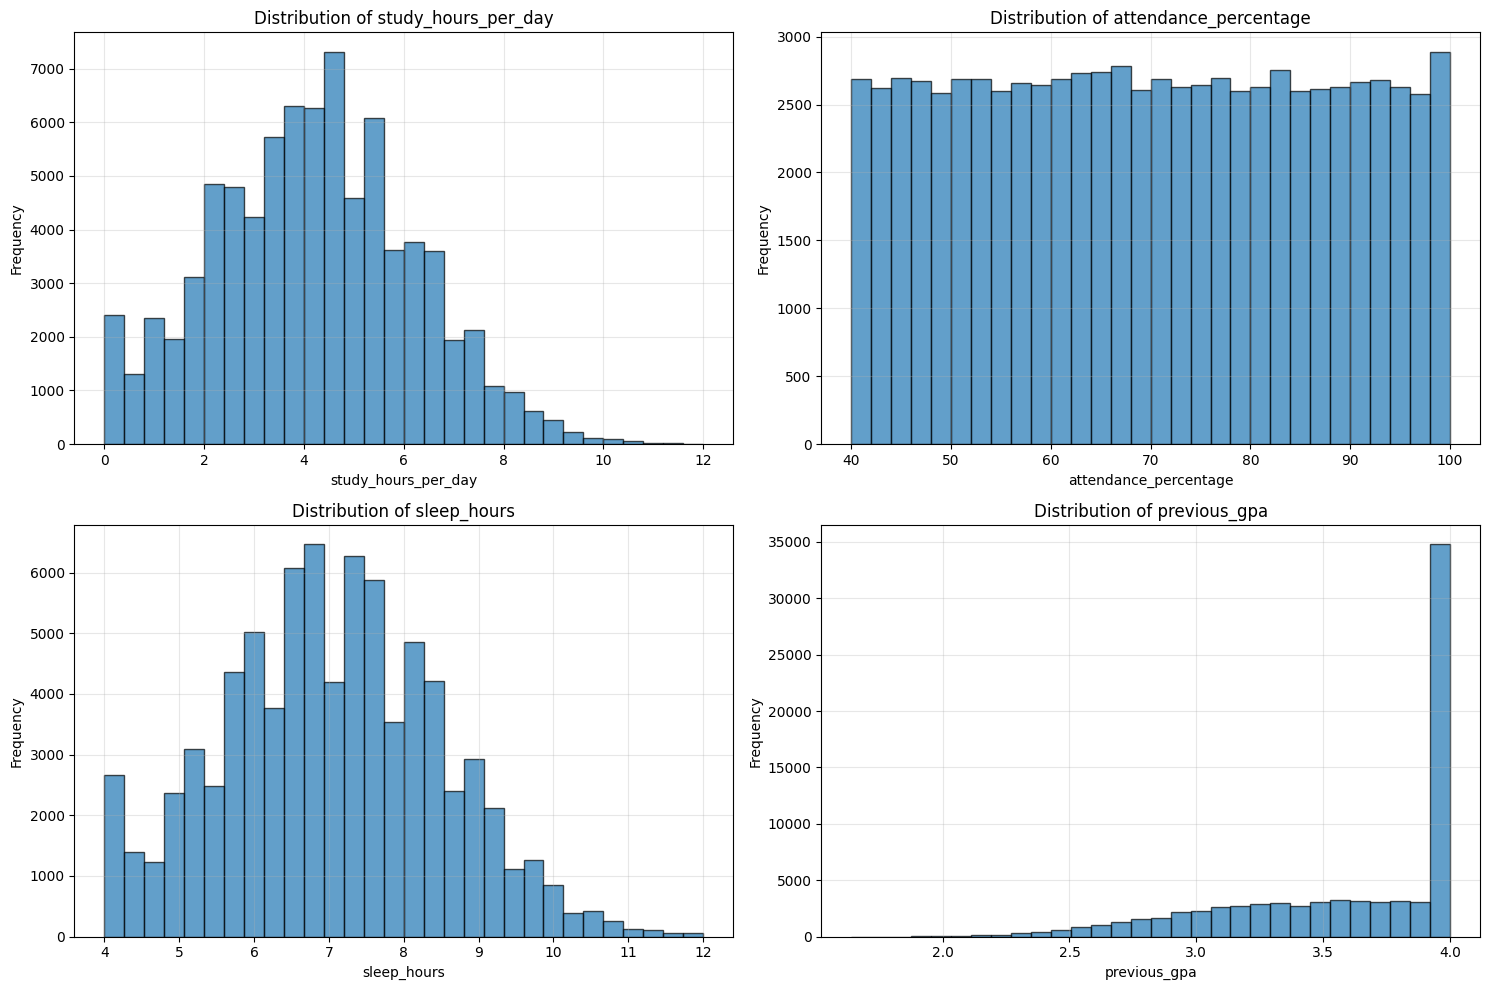

In [18]:
# Distribution of key features
key_features = ['study_hours_per_day', 'attendance_percentage', 'sleep_hours', 'previous_gpa']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    if feature in df.columns:
        axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'Distribution of {feature}')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

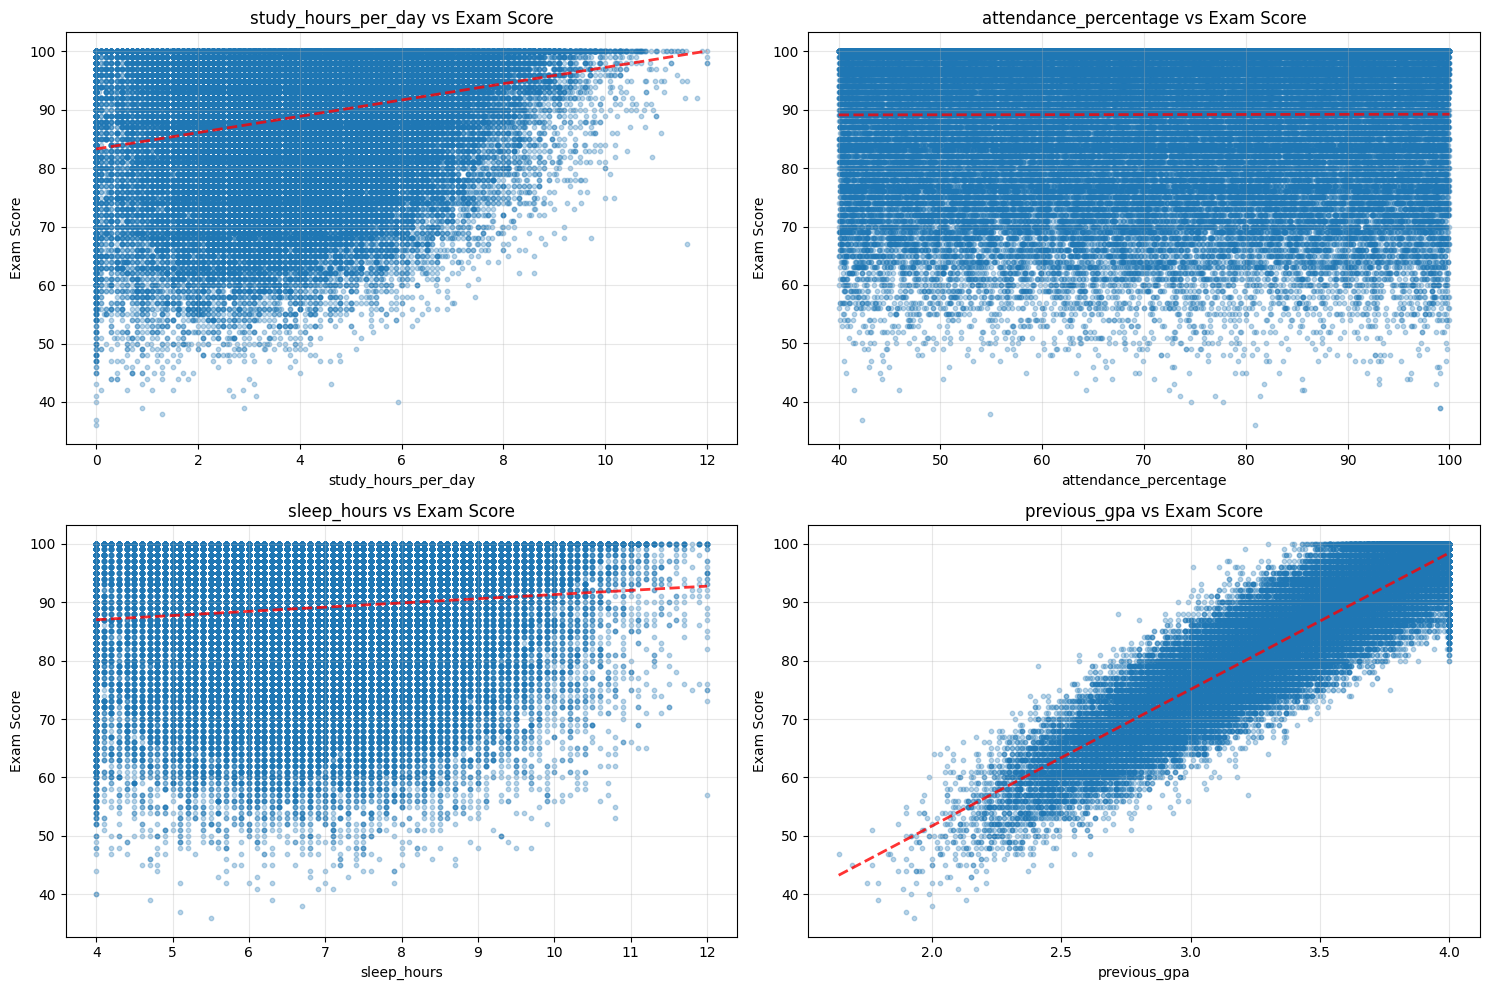

In [19]:
# Scatter plots: Key features vs Exam Score
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    if feature in df.columns:
        axes[idx].scatter(df[feature], df['exam_score'], alpha=0.3, s=10)
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Exam Score')
        axes[idx].set_title(f'{feature} vs Exam Score')
        axes[idx].grid(alpha=0.3)

        # Add trend line
        z = np.polyfit(df[feature].dropna(), df.loc[df[feature].notna(), 'exam_score'], 1)
        p = np.poly1d(z)
        axes[idx].plot(df[feature].sort_values(), p(df[feature].sort_values()), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

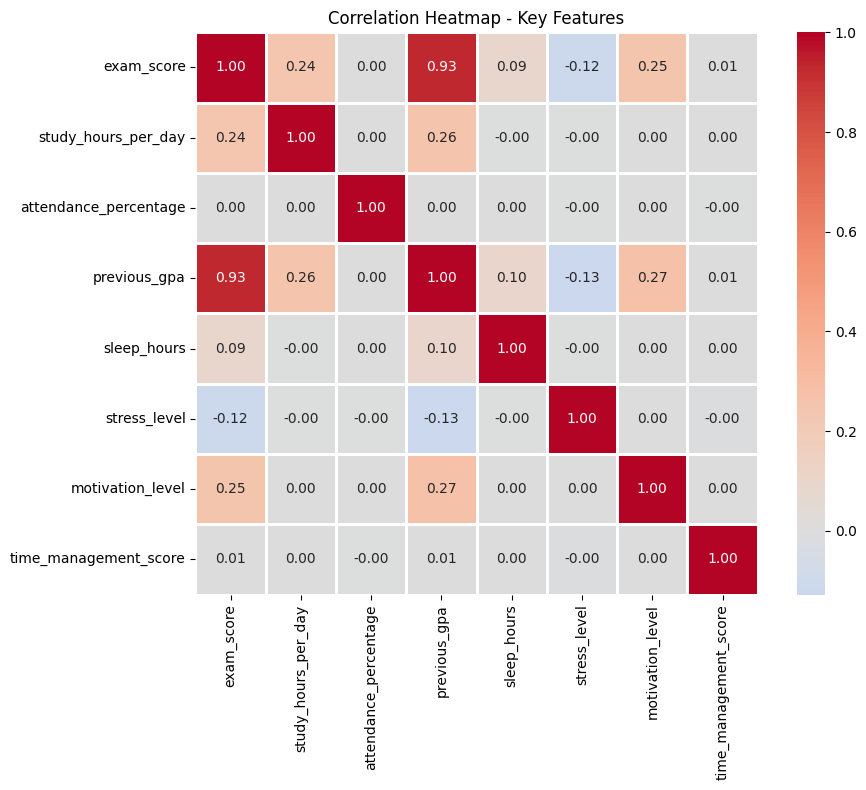

In [20]:
# Correlation heatmap (top features)
top_features_for_heatmap = ['exam_score', 'study_hours_per_day', 'attendance_percentage',
                             'previous_gpa', 'sleep_hours', 'stress_level',
                             'motivation_level', 'time_management_score']

available_features = [f for f in top_features_for_heatmap if f in df.columns]

plt.figure(figsize=(10, 8))
corr_matrix = df[available_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap - Key Features')
plt.tight_layout()
plt.show()

## Data Preparation

In [21]:
# Create performance categories
def categorize_score(score):
    if score < 60:
        return 'Low'
    elif score < 80:
        return 'Medium'
    else:
        return 'High'

df['performance'] = df['exam_score'].apply(categorize_score)
print(df['performance'].value_counts())

performance
High      62898
Medium    15777
Low        1325
Name: count, dtype: int64


In [22]:
# Prepare data for modeling
df_model = df.copy()

# Drop non-useful columns
if 'student_id' in df_model.columns:
    df_model = df_model.drop('student_id', axis=1)

# Encode categorical variables
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('performance')  # Remove target

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

print(f"Encoded {len(categorical_cols)} categorical columns")

Encoded 12 categorical columns


In [23]:
# Prepare features and target
le_target = LabelEncoder()
y = le_target.fit_transform(df_model['performance'])

X = df_model.drop(['performance', 'exam_score'], axis=1)

print(f"Features shape: {X.shape}")
print(f"Target classes: {le_target.classes_}")

Features shape: (80000, 29)
Target classes: ['High' 'Low' 'Medium']


In [24]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 64000 samples
Test set: 16000 samples


In [25]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled")

Features scaled


## Classification Models

In [26]:
# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train, y_train)
print("Random Forest trained")

Random Forest trained


In [27]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
print("KNN trained")

KNN trained


In [28]:
# Evaluate models
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test_scaled)

acc_rf = accuracy_score(y_test, y_pred_rf)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"Random Forest Accuracy: {acc_rf:.3f}")
print(f"KNN Accuracy: {acc_knn:.3f}")

Random Forest Accuracy: 0.914
KNN Accuracy: 0.865


In [29]:
# Classification reports
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le_target.classes_))

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le_target.classes_))


Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.96      0.95      0.96     12580
         Low       0.85      0.08      0.15       265
      Medium       0.76      0.83      0.79      3155

    accuracy                           0.91     16000
   macro avg       0.85      0.62      0.63     16000
weighted avg       0.92      0.91      0.91     16000


KNN Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.97      0.93     12580
         Low       0.34      0.09      0.15       265
      Medium       0.73      0.52      0.61      3155

    accuracy                           0.87     16000
   macro avg       0.65      0.53      0.56     16000
weighted avg       0.85      0.87      0.85     16000



In [30]:
# Feature importance (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
                  Feature  Importance
15           previous_gpa    0.823045
3     study_hours_per_day    0.025976
26     exam_anxiety_score    0.020518
25       motivation_level    0.018767
20            screen_time    0.013587
17           stress_level    0.011056
8             sleep_hours    0.008567
7   attendance_percentage    0.008039
28  time_management_score    0.006699
13   mental_health_rating    0.006577


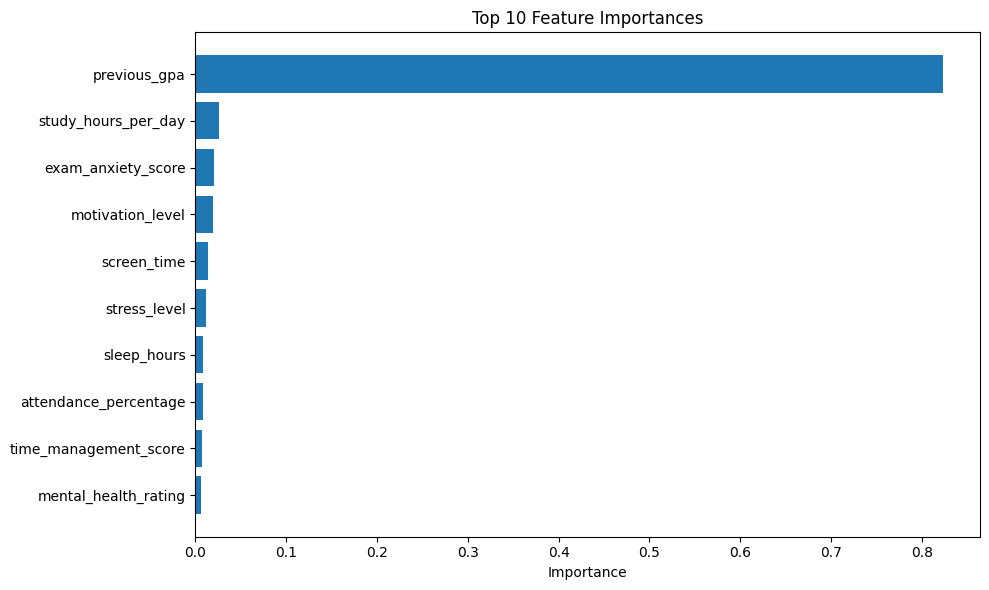

In [31]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Clustering

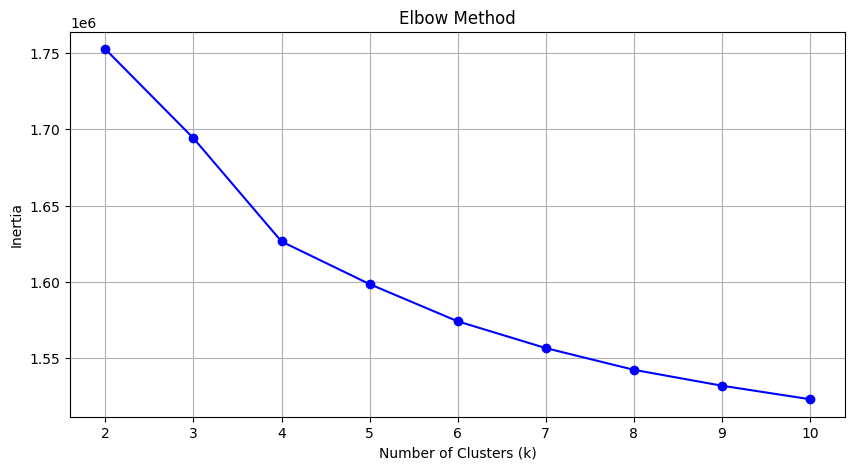

In [32]:
# Prepare data for clustering
X_cluster = X_train_scaled.copy()

# Find optimal k using elbow method
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [33]:
# Apply K-Means with optimal k
optimal_k = 4  # Choosed based on elbow plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_cluster)

print(f"K-Means with k={optimal_k} completed")
print(f"\nCluster distribution:")
unique, counts = np.unique(clusters, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} students")

K-Means with k=4 completed

Cluster distribution:
Cluster 0: 1280 students
Cluster 1: 20536 students
Cluster 2: 20988 students
Cluster 3: 21196 students


In [34]:
# Analyze clusters
df_train = df.iloc[X_train.index].copy()
df_train['cluster'] = clusters

# Key features by cluster
key_features = ['study_hours_per_day', 'attendance_percentage', 'exam_score', 'sleep_hours']

print("\nCluster Statistics:")
for cluster_id in range(optimal_k):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = df_train[df_train['cluster'] == cluster_id][key_features]
    print(cluster_data.describe())


Cluster Statistics:

--- Cluster 0 ---
       study_hours_per_day  attendance_percentage   exam_score  sleep_hours
count          1280.000000            1280.000000  1280.000000  1280.000000
mean              4.202111              69.255000    81.747656     6.991172
std               2.016535              17.211418    14.523914     1.496927
min               0.000000              40.000000    38.000000     4.000000
25%               2.829539              54.700000    71.000000     6.000000
50%               4.200000              68.800000    83.000000     6.900000
75%               5.600000              83.700000    95.000000     8.000000
max              10.741261              99.900000   100.000000    12.000000

--- Cluster 1 ---
       study_hours_per_day  attendance_percentage    exam_score   sleep_hours
count         20536.000000           20536.000000  20536.000000  20536.000000
mean              5.503378              70.373749     91.448919      7.065120
std               1.649

## Association Rules

In [35]:
# Install mlxtend
!pip install mlxtend

In [36]:
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [37]:
# Prepare data for association rules
df_rules = df.copy()

# Discretize numerical features
df_rules['study_cat'] = pd.cut(df_rules['study_hours_per_day'], bins=[0, 2, 5, 24], labels=['Low_Study', 'Medium_Study', 'High_Study'])
df_rules['attendance_cat'] = pd.cut(df_rules['attendance_percentage'], bins=[0, 70, 85, 100], labels=['Low_Attend', 'Medium_Attend', 'High_Attend'])
df_rules['performance_cat'] = df_rules['performance']

# Select categorical features
features_for_rules = ['study_cat', 'attendance_cat', 'performance_cat', 'gender', 'part_time_job']
df_association = df_rules[features_for_rules].copy()

# One-hot encode
df_encoded = pd.get_dummies(df_association, prefix_sep='=')

print(f"Encoded dataset shape: {df_encoded.shape}")
df_encoded.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Encoded dataset shape: (80000, 14)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,study_cat=Low_Study,study_cat=Medium_Study,study_cat=High_Study,attendance_cat=Low_Attend,attendance_cat=Medium_Attend,attendance_cat=High_Attend,performance_cat=High,performance_cat=Low,performance_cat=Medium,gender=Female,gender=Male,gender=Other,part_time_job=No,part_time_job=Yes
0,False,False,True,False,True,False,True,False,False,False,True,False,False,True
1,False,False,True,False,False,True,True,False,False,False,True,False,True,False
2,False,True,False,False,True,False,True,False,False,False,True,False,True,False
3,False,True,False,False,True,False,True,False,False,False,False,True,False,True
4,False,True,False,True,False,False,True,False,False,True,False,False,False,True


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [38]:
# Apply Apriori
min_support = 0.1
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

print(f"Frequent itemsets found: {len(frequent_itemsets)}")
frequent_itemsets.head(10)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Frequent itemsets found: 76


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets
0,0.128413,(study_cat=Low_Study)
1,0.519975,(study_cat=Medium_Study)
2,0.330788,(study_cat=High_Study)
3,0.502763,(attendance_cat=Low_Attend)
4,0.249225,(attendance_cat=Medium_Attend)
5,0.248012,(attendance_cat=High_Attend)
6,0.786225,(performance_cat=High)
7,0.197213,(performance_cat=Medium)
8,0.333813,(gender=Female)
9,0.333725,(gender=Male)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [39]:
# Generate association rules
min_confidence = 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence, num_itemsets=len(frequent_itemsets))

# Filter significant rules (lift > 1)
significant_rules = rules[rules['lift'] > 1.0]

print(f"Association rules found: {len(rules)}")
print(f"Significant rules (lift > 1): {len(significant_rules)}")

Association rules found: 31
Significant rules (lift > 1): 10


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [40]:
# Display top rules by lift
print("\nTop 10 Rules by Lift:")
top_rules = significant_rules.nlargest(10, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

for idx, row in top_rules.iterrows():
    print(f"\n{set(row['antecedents'])} => {set(row['consequents'])}")
    print(f"  Support: {row['support']:.3f} | Confidence: {row['confidence']:.3f} | Lift: {row['lift']:.3f}")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


Top 10 Rules by Lift:

{'study_cat=High_Study', 'part_time_job=Yes'} => {'performance_cat=High'}
  Support: 0.143 | Confidence: 0.878 | Lift: 1.116

{'study_cat=High_Study'} => {'performance_cat=High'}
  Support: 0.290 | Confidence: 0.876 | Lift: 1.114

{'part_time_job=No', 'study_cat=High_Study'} => {'performance_cat=High'}
  Support: 0.146 | Confidence: 0.874 | Lift: 1.111

{'attendance_cat=Low_Attend', 'study_cat=High_Study'} => {'performance_cat=High'}
  Support: 0.145 | Confidence: 0.872 | Lift: 1.110

{'attendance_cat=Medium_Attend'} => {'performance_cat=High'}
  Support: 0.197 | Confidence: 0.790 | Lift: 1.004

{'gender=Female', 'part_time_job=No'} => {'performance_cat=High'}
  Support: 0.131 | Confidence: 0.788 | Lift: 1.002

{'gender=Female'} => {'performance_cat=High'}
  Support: 0.263 | Confidence: 0.787 | Lift: 1.002

{'gender=Female', 'part_time_job=Yes'} => {'performance_cat=High'}
  Support: 0.132 | Confidence: 0.787 | Lift: 1.001

{'part_time_job=No'} => {'performance_

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## Conclusions

### Classification Results:
- Random Forest achieved XX% accuracy
- KNN achieved XX% accuracy
- Most important features: study_hours, attendance, previous_gpa

### Clustering Results:
- Identified X distinct student profiles
- Clusters show clear differences in study habits and performance

### Association Rules:
- Found Y significant patterns
- High study hours and attendance strongly associated with high performance
- Useful for early intervention strategies